## Laptop Price Prediction

## Getting the Data

In [1]:
# Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Getting the dataset
df = pd.read_csv("laptop_data.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
# Checking the shape
df.shape

(1303, 12)

In [4]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
# Checking for duplicated values
df.duplicated().sum()

0

In [6]:
# Checking for null values
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

## Data preprocessing

In [7]:
# Deleting unnecessary columns
df.drop(columns = ['Unnamed: 0'],inplace = True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [8]:
# Making the Ram and Weight column into integer only by  removing 'GB'  and 'kg' from it
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [9]:
# Converting them into integer data type
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [10]:
# ScreenResolution column have a variety of information
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [11]:
# From ScreenResolution column we can obtain that our laptop is touchscreen or not
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
df.sample(6)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1263,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,500GB HDD,Intel HD Graphics 400,Linux,2.40,15397.9200,0
469,Lenovo,Ultrabook,14.0,IPS Panel Quad HD+ 2560x1440,Intel Core i7 6600U 2.6GHz,12,256GB SSD,Intel HD Graphics 520,Windows 10,1.40,98994.2400,0
931,HP,Ultrabook,12.5,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.26,84129.1200,0
678,LG,Ultrabook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.09,122490.7200,0
579,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,AMD Radeon R5 M430,Linux,2.20,39907.2528,0
141,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon RX 550,Windows 10,1.75,59461.5456,0


In [12]:
# From ScreenResolution column we can obtain that our laptop has IPS pannel or not
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)
df.sample(6)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
454,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,128GB SSD + 1TB HDD,AMD Radeon 530,Windows 10,2.36,52161.12,0,0
373,Lenovo,Notebook,17.3,1600x900,AMD A8-Series 7410 2.2GHz,4,128GB SSD,AMD Radeon R5,Windows 10,2.60,26053.92,0,0
1094,HP,Netbook,12.5,1366x768,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 7,2.40,85194.72,0,0
397,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.90,49976.64,0,1
208,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.20,77202.72,0,0
157,Asus,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.10,70063.20,1,0


In [13]:
# Now we will get the x and y resolution from the ScreenResolution column
new = df['ScreenResolution'].str.split('x',n=1,expand=True)
new.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [14]:
df['X_res'] = new[0]
df['Y_res'] = new[1]
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
210,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Linux,2.40,41505.120,0,0,Full HD 1920,1080
135,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.63,52640.640,0,0,Full HD 1920,1080
220,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon 520,Linux,2.20,36089.208,0,0,Full HD 1920,1080
1257,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.29,26107.200,0,0,1366,768
626,Mediacom,Notebook,14.0,Full HD 1920x1080,Intel Atom x5-Z8350 1.44GHz,2,32GB Flash Storage,Intel HD Graphics,Windows 10,1.40,12733.920,0,0,Full HD 1920,1080


In [15]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
1285,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.72,1,1,3200,1800
202,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 940MX,Windows 10,2.23,39533.76,0,0,1920,1080
1200,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,128GB SSD,AMD Radeon R7 M440,Windows 10,2.30,26586.72,0,0,1366,768
891,HP,2 in 1 Convertible,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7500U 2.7GHz,16,256GB SSD,Intel HD Graphics 620,Windows 10,1.42,74538.72,1,0,3200,1800
334,Asus,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.50,53226.72,0,0,1920,1080


In [16]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


In [17]:
# Now we will create a new column which is Pixel per Inches
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [18]:
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)
df.sample(7)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
154,HP,Ultrabook,Intel Core i5 7500U 2.7GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,1.48,57648.9600,0,0,157.350512
229,HP,Notebook,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD FirePro W4190M,Windows 10,1.90,67612.3200,0,0,141.211998
901,Asus,Gaming,Intel Core i7 6820HK 2.7GHz,32,256GB SSD + 256GB SSD,Nvidia GeForce GTX 980M,Windows 10,3.58,68145.1200,0,1,127.335675
300,Asus,Notebook,Intel Core i3 7100U 2.4GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.30,27119.5200,0,0,111.935204
1094,HP,Netbook,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 7,2.40,85194.7200,0,0,125.367428
1230,Lenovo,Netbook,Intel Core i7 6500U 2.50GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,87912.0000,1,1,176.232574
1063,Dell,Notebook,Intel Core i7 7500U 2.7GHz,16,2TB HDD,AMD Radeon R7 M445,Windows 10,2.32,52746.6672,0,0,141.211998


In [19]:
# Cpu column also contain a variety of information in it
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [20]:
df['Cpu_name'] = df['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu_name
393,MSI,Gaming,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.70,71874.72,0,0,127.335675,Intel Core i7
684,Lenovo,2 in 1 Convertible,Intel Core i7 8550U 1.8GHz,8,512GB SSD,Intel UHD Graphics 620,Windows 10,1.19,79866.72,1,1,165.632118,Intel Core i7
1002,Dell,Notebook,Intel Core i3 7100U 2.4GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,2.18,29144.16,0,0,100.454670,Intel Core i3
232,Lenovo,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.20,79866.72,0,1,141.211998,Intel Core i7
1004,Toshiba,Notebook,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.20,63669.60,0,0,165.632118,Intel Core i5


In [21]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [22]:
df['Cpu brand'] = df['Cpu_name'].apply(fetch_processor)
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu_name,Cpu brand
831,Lenovo,Ultrabook,Intel Core i7 6600U 2.6GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.10,111834.7200,0,1,209.800683,Intel Core i7,Intel Core i7
720,Lenovo,Ultrabook,Intel Core i7 6500U 2.5GHz,8,512GB SSD,Intel HD Graphics 520,Windows 10,1.17,89864.1792,0,1,209.800683,Intel Core i7,Intel Core i7
259,Lenovo,2 in 1 Convertible,Intel Core i7 7700HQ 2.8GHz,8,512GB SSD,Nvidia GeForce GTX 1050M,Windows 10,2.00,90522.7200,1,1,141.211998,Intel Core i7,Intel Core i7
922,HP,Ultrabook,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.39,61218.7200,1,0,276.053530,Intel Core i7,Intel Core i7
1193,Apple,Ultrabook,Intel Core M 1.1GHz,8,256GB Flash Storage,Intel HD Graphics 5300,Mac OS X,0.92,61964.6400,0,1,226.415547,Intel Core M,Other Intel Processor


In [23]:
df.drop(columns=['Cpu','Cpu_name'],inplace=True)
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand
114,Dell,Ultrabook,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.21,86793.1200,0,1,165.632118,Intel Core i5
862,Toshiba,Notebook,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.05,68464.8000,0,0,165.632118,Intel Core i5
464,Lenovo,Notebook,8,256GB SSD,Nvidia Quadro M2200M,Windows 10,2.67,111355.2000,0,0,141.211998,Intel Core i7
421,Chuwi,Notebook,6,64GB Flash Storage,Intel HD Graphics 500,Windows 10,1.40,23922.7200,0,1,267.338436,Other Intel Processor
80,Dell,Ultrabook,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.88,58403.4048,0,1,141.211998,Intel Core i5


In [24]:
# Memory column have a lot of variation
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [25]:
# We will make 4 different column from the memory column

df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

df.drop(columns=['Memory'],inplace=True)

df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
522,Dell,Notebook,8,Intel HD Graphics 620,Windows 10,1.64,68184.0144,0,0,157.350512,Intel Core i5,0,256,0,0
1196,Lenovo,Notebook,4,AMD Radeon R5 M430,No OS,1.90,19607.0400,0,0,100.454670,Intel Core i3,1000,0,0,0
13,Dell,Notebook,4,AMD Radeon R5 M430,Windows 10,2.20,26581.3920,0,0,141.211998,Intel Core i3,0,256,0,0
360,HP,Notebook,4,Intel HD Graphics 520,Windows 10,1.86,23389.9200,0,0,100.454670,Intel Core i3,500,0,0,0
740,Dell,Notebook,8,Nvidia GeForce 940MX,Windows 10,2.00,64308.9600,0,0,141.211998,Intel Core i7,1000,128,0,0


In [26]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [27]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand
930,Lenovo,Notebook,4,Intel HD Graphics 505,Windows 10,2.20,16463.520,0,0,100.454670,Other Intel Processor,1000,0,0,0,Intel
39,HP,Notebook,8,Nvidia GeForce 930MX,Windows 10,2.10,46833.120,0,0,141.211998,Intel Core i5,0,256,0,0,Nvidia
888,Acer,Netbook,4,Intel HD Graphics 400,Chrome OS,1.25,15824.160,0,1,135.094211,Other Intel Processor,0,0,0,32,Intel
947,Lenovo,Notebook,8,Nvidia GeForce 920MX,No OS,2.20,36496.800,0,0,141.211998,Intel Core i7,1000,0,0,0,Nvidia
459,HP,Notebook,8,Intel HD Graphics 520,Windows 10,2.50,34093.872,0,0,106.113062,Intel Core i3,0,256,0,0,Intel


In [28]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [29]:
df = df[df['Gpu brand'] != 'ARM']

In [30]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

In [31]:
df.drop(columns=['Gpu'],inplace=True)

In [32]:
# Lets check out the OpSys column
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [33]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [34]:
df['os'] = df['OpSys'].apply(cat_os)

In [35]:
df.drop(columns=['OpSys'],inplace=True)
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel,Mac


## Exploratory Data Analysis

<Axes: xlabel='Price', ylabel='Density'>

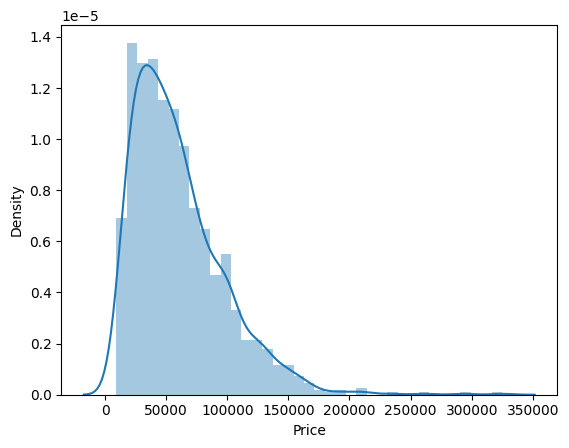

In [36]:
# Ploting the Price of all Laptop
sns.distplot(df['Price'])

**Data is a bit skewed as we have most laptop in the price range of 0 to 150000 and very less above it.**


<Axes: >

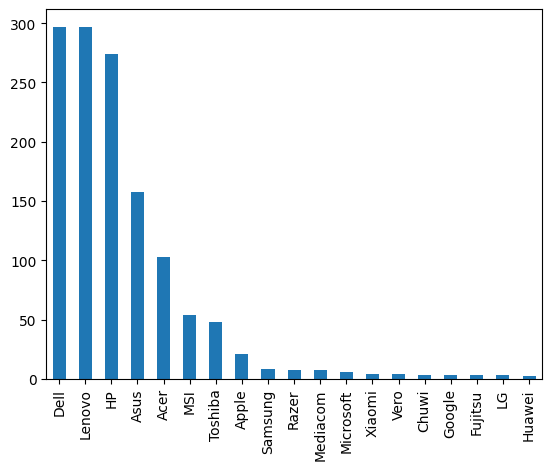

In [37]:
# Checking the Companies which has the most laptops  present in the dataset
df['Company'].value_counts().plot(kind = 'bar')

**As we can see Dell,Lenovo,HP,Asus,Acer companies have the most laptop in our dataset.**

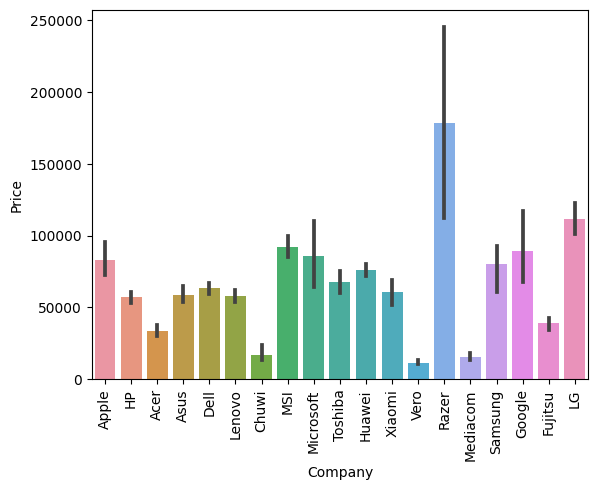

In [38]:
# Checking the prices of laptops according to companies
sns.barplot(x = df['Company'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

**Here we can see prices of laptops with brands like Apple, Razer, MSI, Microsoft are high while brands like HP, Dell, Asus, Xiaomi are more in average price range.**

<Axes: >

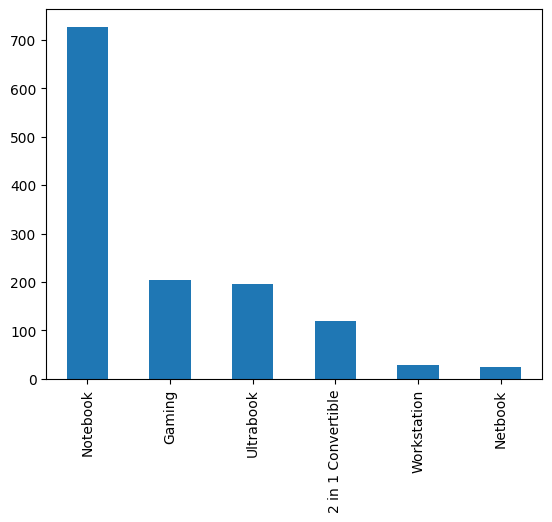

In [39]:
# Checking different types of Laptop present in the dataset
df['TypeName'].value_counts().plot(kind = 'bar')

**Notebook types of Laptop sells the most among the people.**

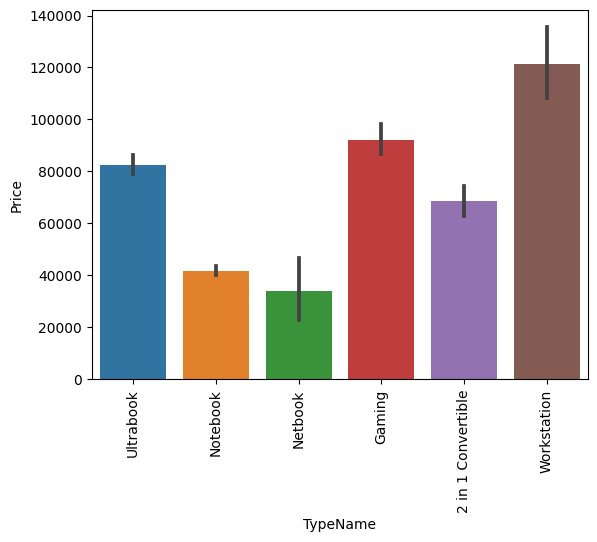

In [40]:
# Checking the average prices of laptops according to TypeName
sns.barplot(x = df['TypeName'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

**Workstation and Gaming laptops are more pricey while Notebook and Netbook are the least pricey.**

<Axes: >

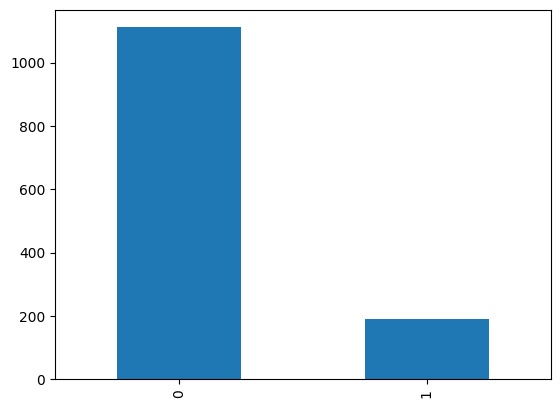

In [41]:
# Checking if Touchscreen column effect the price or not
df['Touchscreen'].value_counts().plot(kind = 'bar')

**There are more laptop in the data which are not touchscreen and very few are touchscreen.**

<Axes: xlabel='Touchscreen', ylabel='Price'>

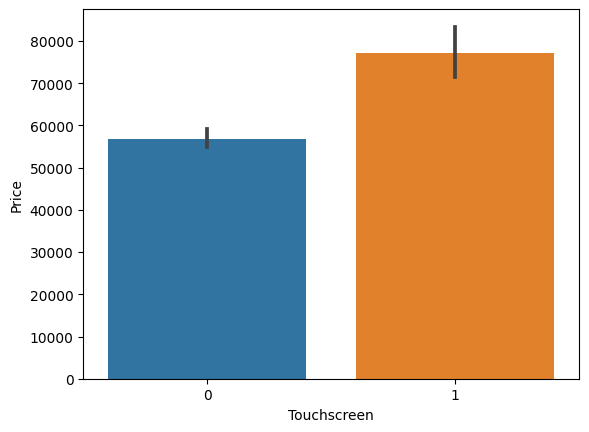

In [42]:
sns.barplot(x=df['Touchscreen'], y = df['Price'])

**The laptop which are touch screen although less in number but are tend to be more pricy then those which are not touchscreen.**

<Axes: >

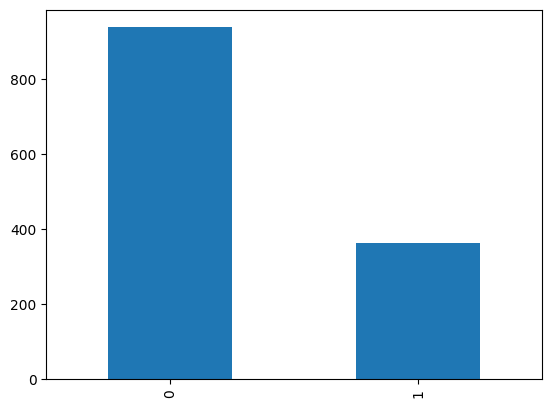

In [43]:
# Checking if IPS column effect the price or not
df['IPS'].value_counts().plot(kind = 'bar')

<Axes: xlabel='IPS', ylabel='Price'>

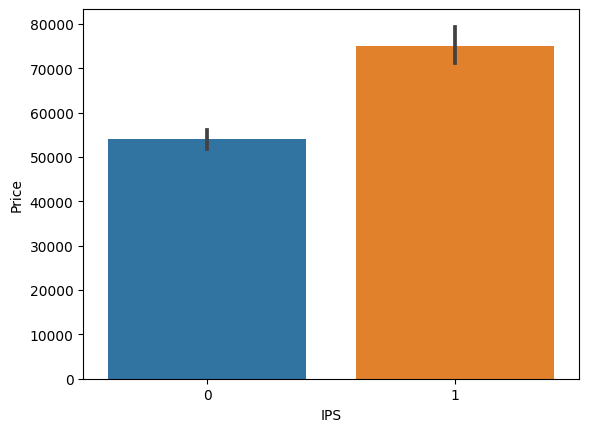

In [44]:
sns.barplot(x=df['IPS'], y = df['Price'])

**The laptop which have IPS pannel are less in number but are tend to be more pricy then those which do not have IPS pannel.**

<Axes: >

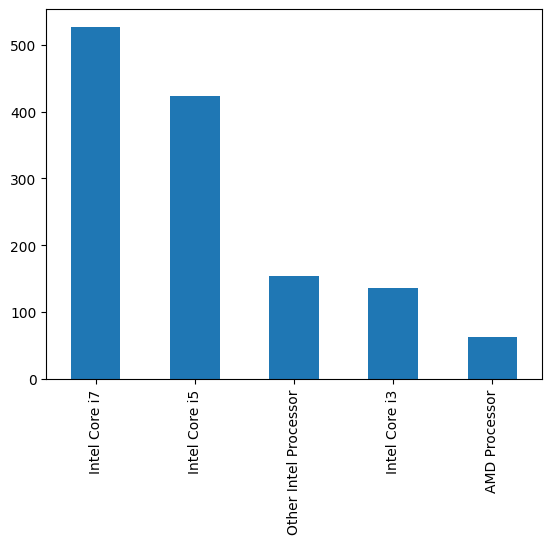

In [45]:
# Checking if the Cpu brand has a effect on price or not
df['Cpu brand'].value_counts().plot(kind='bar')

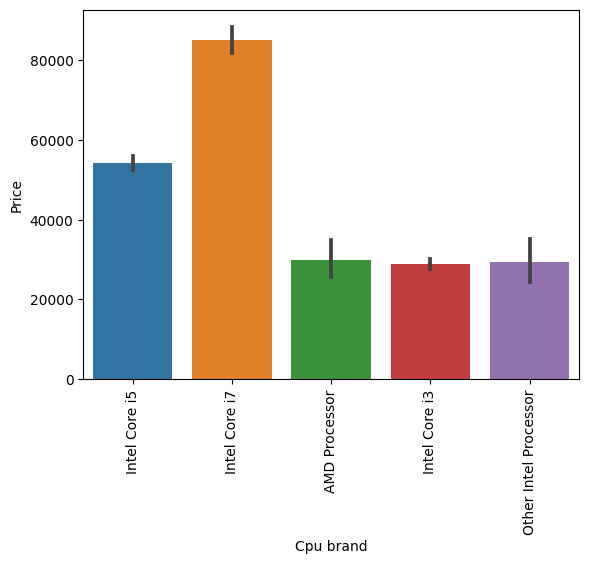

In [46]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

**As we can see Intel core i5 and i7 cpu are more costly then the other brands of cpu.**

<Axes: >

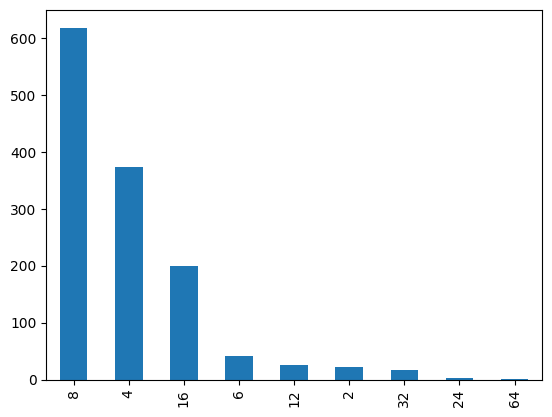

In [47]:
# Checking if the laptop Ram has a effect on price or not
df['Ram'].value_counts().plot(kind='bar')

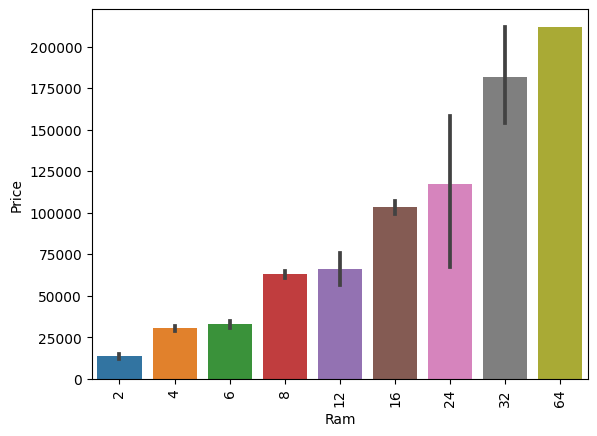

In [48]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

**As we can see clearly the higher the ram a laptop have the more costly it would be.**

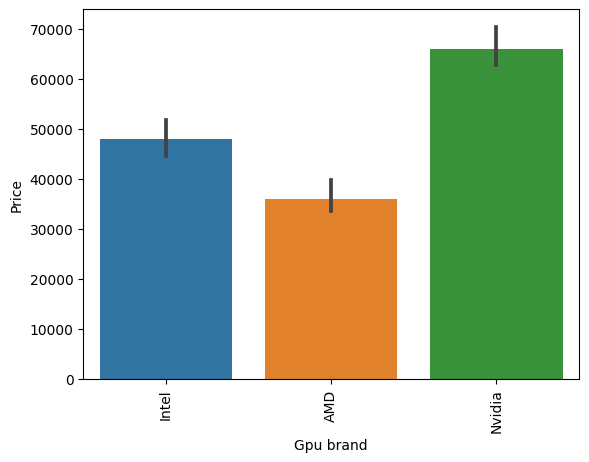

In [49]:
# Checking if the laptop Gpu brand has a effect on price or not
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

**Nividia Gpu are more costly in consider to other**

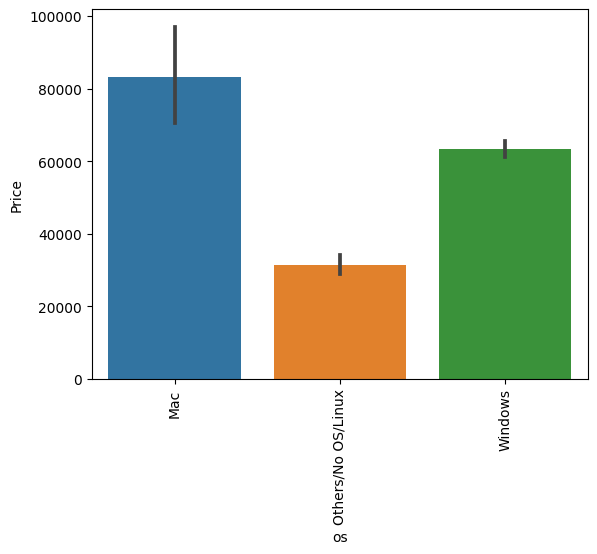

In [53]:
# Checking if the laptop OS  has a effect on price or not
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

**Laptop having Mac OS are very costly**

<Axes: xlabel='Weight', ylabel='Density'>

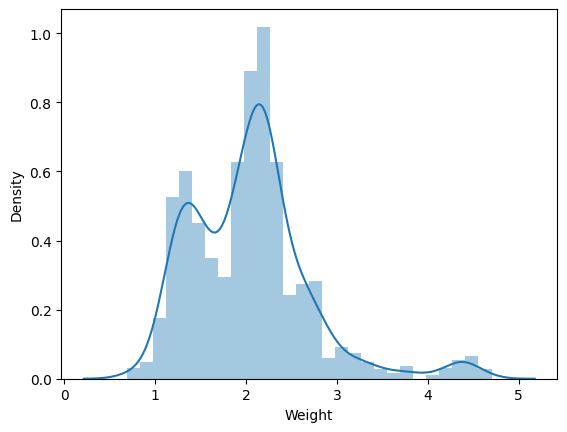

In [54]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

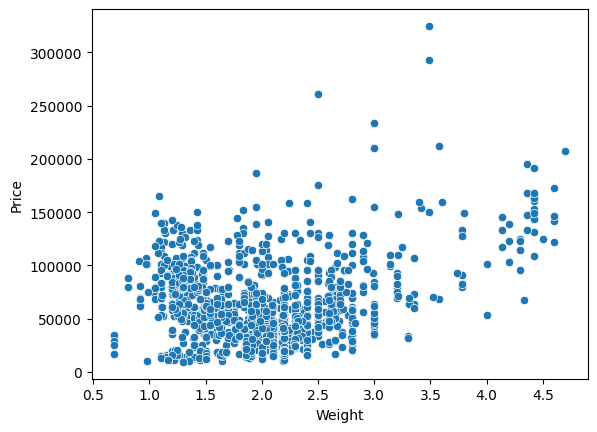

In [55]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

**It has a very weak co relation with the price**

## Corelation

In [56]:
df.corr()['Price']

Ram              0.742905
Weight           0.209867
Price            1.000000
Touchscreen      0.192917
IPS              0.253320
ppi              0.475368
HDD             -0.096891
SSD              0.670660
Hybrid           0.007942
Flash_Storage   -0.040067
Name: Price, dtype: float64

<Axes: >

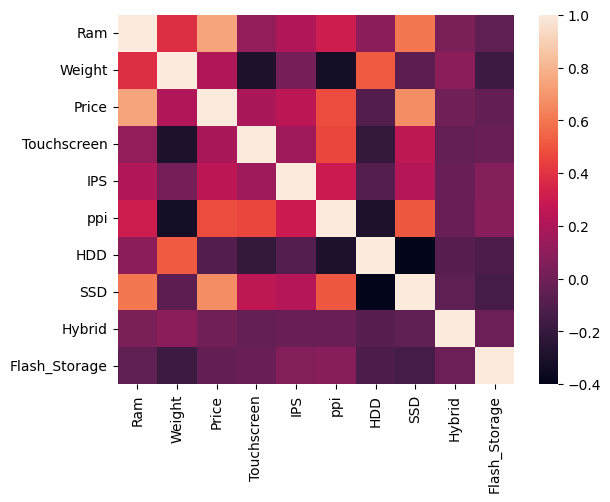

In [57]:
sns.heatmap(df.corr())

In [58]:
# As Hybrid and Flash_Storage column have a very weak corelation so we can drop them
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

<Axes: xlabel='Price', ylabel='Density'>

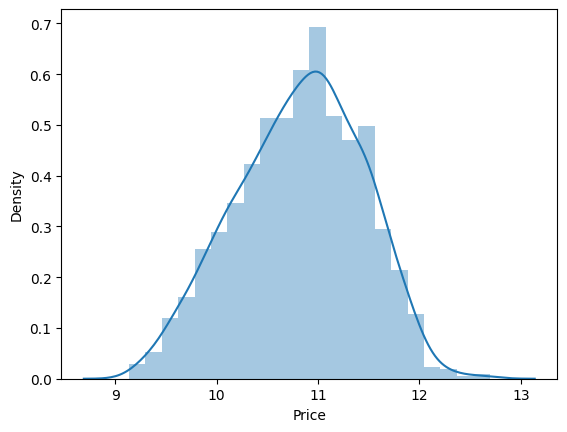

In [59]:
sns.distplot(np.log(df['Price']))

In [60]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [61]:
X

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [62]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

## Spliting the Data

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

## Various Models

### Linear Regression

R2 score 0.8073277448418629
MAE 0.2101782797642888


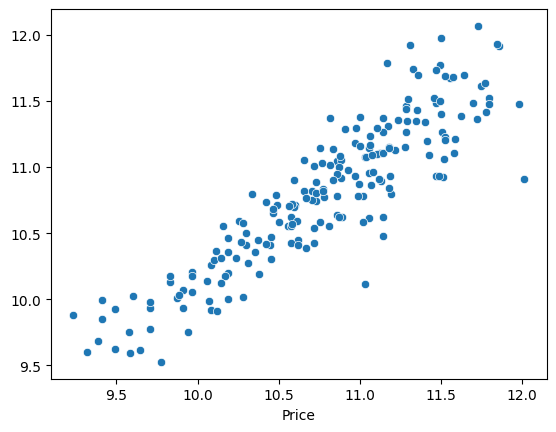

In [100]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
Lr = r2_score(y_test,y_pred)
sns.scatterplot(x=y_test,y=y_pred)
plt.show()

### Ridge Regression

R2 score 0.8127331031311809
MAE 0.20926802242582968


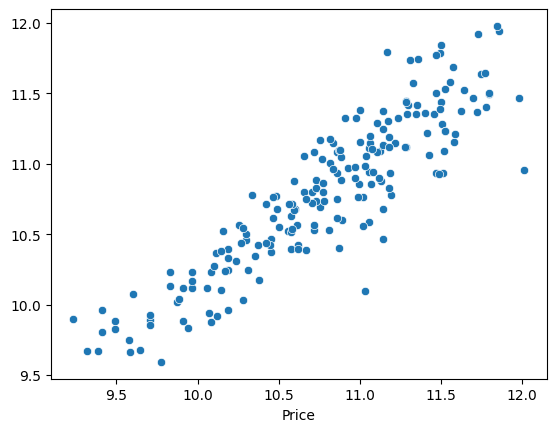

In [101]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
Rr = r2_score(y_test,y_pred)
sns.scatterplot(x=y_test,y=y_pred)
plt.show()

### Lasso Regression

R2 score 0.8071853945317105
MAE 0.21114361613472565


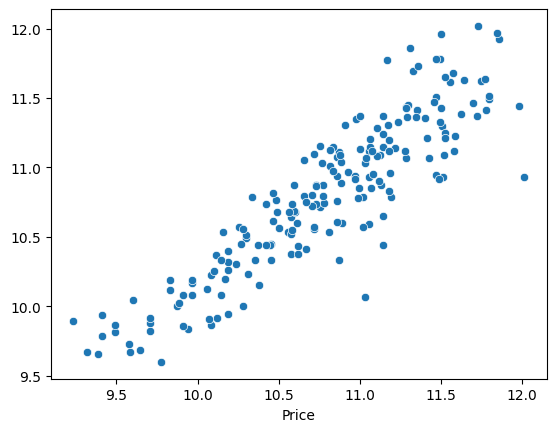

In [102]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
La = r2_score(y_test,y_pred)
sns.scatterplot(x=y_test,y=y_pred)
plt.show()

### KNN

R2 score 0.8009101720524295
MAE 0.19413408395581944


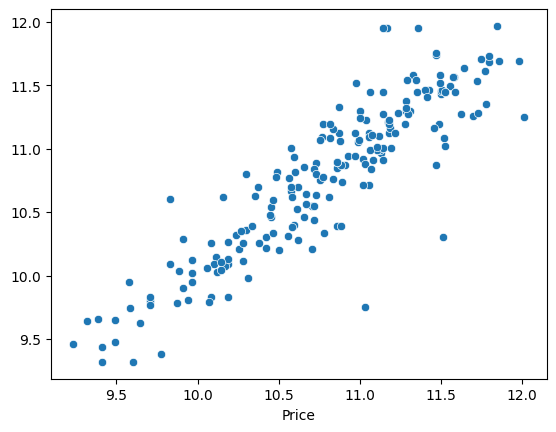

In [103]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
Knn = r2_score(y_test,y_pred)
sns.scatterplot(x=y_test,y=y_pred)
plt.show()

### Decision Tree

R2 score 0.8468192635641472
MAE 0.17901188518197347


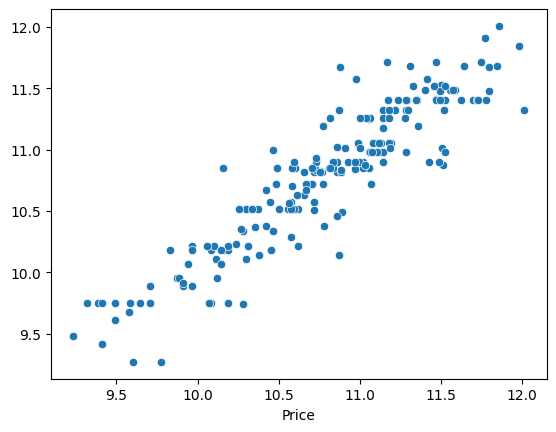

In [104]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
dt = r2_score(y_test,y_pred)
sns.scatterplot(x=y_test,y=y_pred)
plt.show()

### SVM

R2 score 0.8083180902272435
MAE 0.20239059427315706


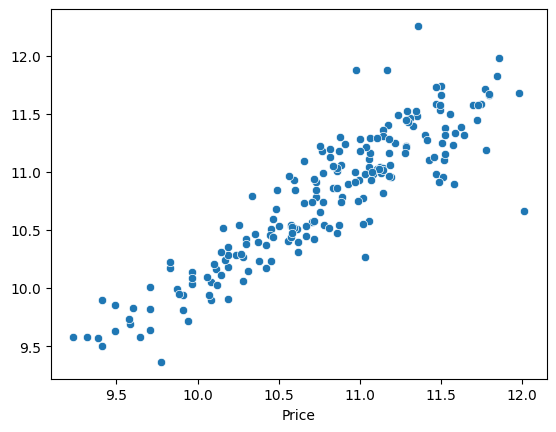

In [105]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
svm = r2_score(y_test,y_pred)
sns.scatterplot(x=y_test,y=y_pred)
plt.show()

### Random Forest

R2 score 0.8873402378382488
MAE 0.15860130110457718


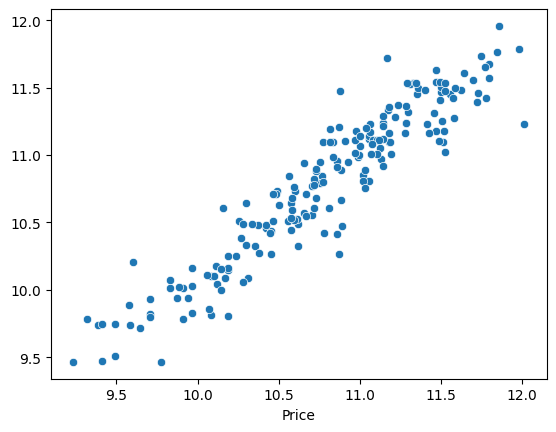

In [106]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
Rf = r2_score(y_test,y_pred)
sns.scatterplot(x=y_test,y=y_pred)
plt.show()

### AdaBoost

R2 score 0.8069363377718336
MAE 0.22223595150975534


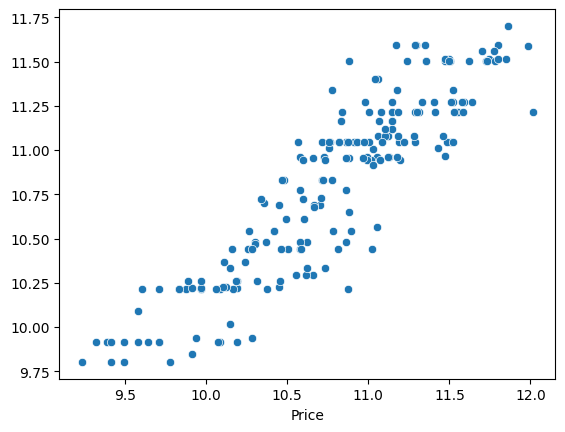

In [107]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
Ab = r2_score(y_test,y_pred)
sns.scatterplot(x=y_test,y=y_pred)
plt.show()

### Gradient Boost

R2 score 0.8827842180968433
MAE 0.15926177887710802


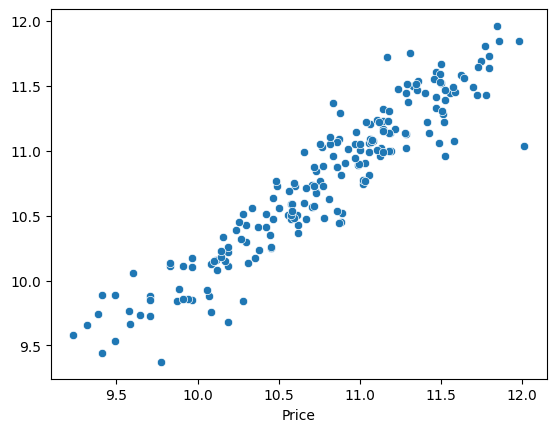

In [108]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
Gb = r2_score(y_test,y_pred)
sns.scatterplot(x=y_test,y=y_pred)
plt.show()

### XgBoost

R2 score 0.8811773435850243
MAE 0.16496203512600974


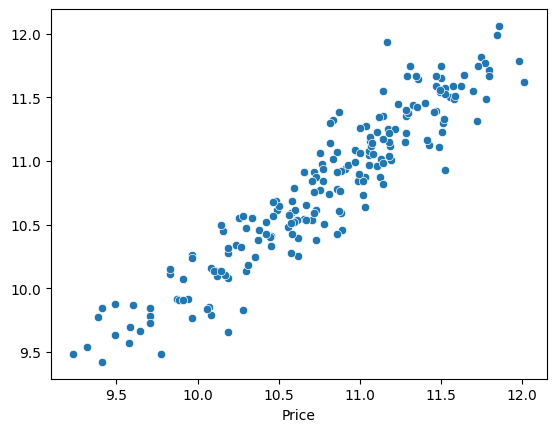

In [109]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
Xg  =r2_score(y_test,y_pred)
sns.scatterplot(x=y_test,y=y_pred)
plt.show()

### Voting Regressor

R2 score 0.8910845427857703
MAE 0.1566717380474877


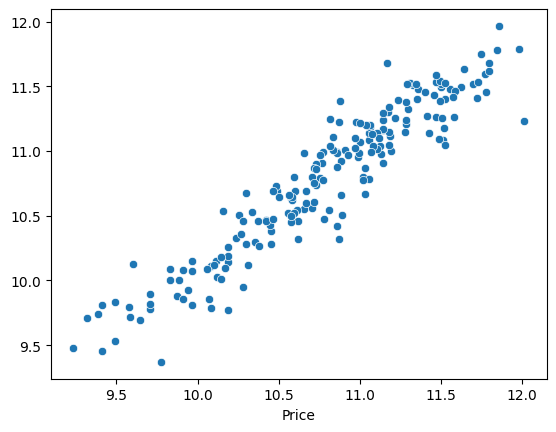

In [110]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
Vg = r2_score(y_test,y_pred)
sns.scatterplot(x=y_test,y=y_pred)
plt.show()

### Stacking

R2 score 0.8810657991126162
MAE 0.16709898540766566


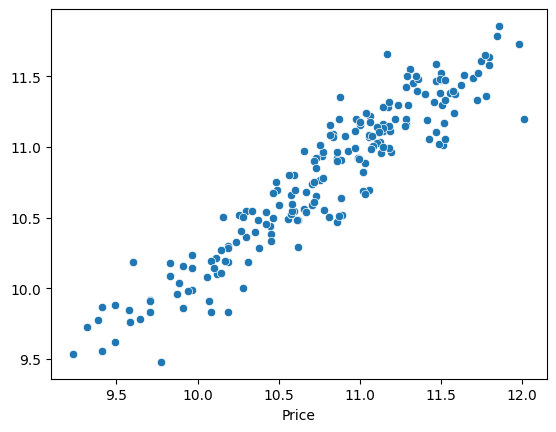

In [111]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
St = r2_score(y_test,y_pred)
sns.scatterplot(x=y_test,y=y_pred)
plt.show()

In [93]:
series = pd.Series([Lr,Rr,La,Knn,dt,svm,Rf,Ab,Gb,Xg,Vg,St], name='R2 Score')
names = pd.Series(['Linear Regression','Ridge Regression','Laso Regression','KNN','Decesion Tree','SVM','Random Forest','AdaBoost','Gradient Boosting','XbBoost','Voting Regrssor','Stacking'], name='Algo')
new_df=pd.concat([names,series],axis=1)
print(new_df)

                 Algo  R2 Score
0   Linear Regression  0.807328
1    Ridge Regression  0.812733
2     Laso Regression  0.807185
3                 KNN  0.800910
4       Decesion Tree  0.843828
5                 SVM  0.808318
6       Random Forest  0.887340
7            AdaBoost  0.795876
8   Gradient Boosting  0.884050
9             XbBoost  0.881177
10    Voting Regrssor  0.890846
11           Stacking  0.880335


In [98]:
new_df.sort_values(by = 'R2 Score',ascending = False)

,Algo,R2 Score
10,Voting Regrssor,0.890846
6,Random Forest,0.887340
8,Gradient Boosting,0.884050
9,XbBoost,0.881177
11,Stacking,0.880335
4,Decesion Tree,0.843828
1,Ridge Regression,0.812733
5,SVM,0.808318
0,Linear Regression,0.807328
2,Laso Regression,0.807185


**Voting Regrssor , Random Forest, Gradient Boosting are the best performing models**

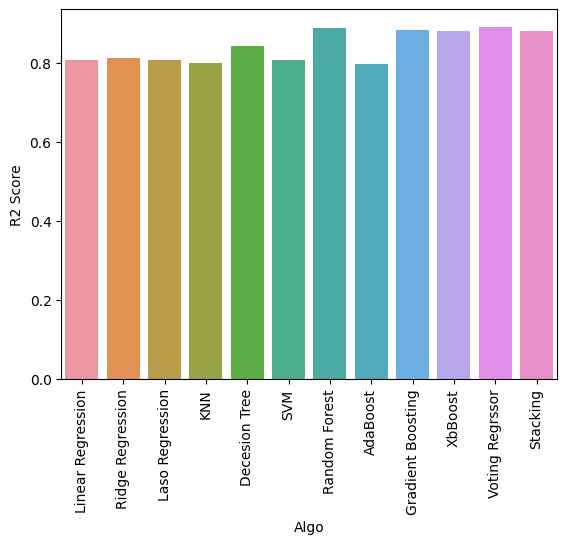

In [95]:
sns.barplot(x=new_df['Algo'],y=new_df['R2 Score'])
plt.xticks(rotation='vertical')
plt.show()

## ★·.·´¯`·.·★ Ｔℍᗩ𝕟Ⓚ ㄚ𝕠𝓤 ★·.·´¯`·.·★